<a href="https://colab.research.google.com/github/mansibhakare11/DL_ASS/blob/main/MDM_ASS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course Name: Deep Learning

Lab Title: Time Series Forecasting using LSTM

Student Name: Bhakare Mansi

Student ID: 202302040005

Date of Submission: 25-2-25

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/diabetes.csv")

# Split data into features and target
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column as target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X @ weights)
    cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, lr, epochs):
    m = len(y)
    for _ in range(epochs):
        h = sigmoid(X @ weights)
        gradient = (1/m) * X.T @ (h - y)
        weights -= lr * gradient
    return weights

# Add bias term
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize weights
weights = np.zeros(X_train_bias.shape[1])

# Train model
weights = gradient_descent(X_train_bias, y_train, weights, lr=0.01, epochs=1000)

# Predictions
y_pred = sigmoid(X_test_bias @ weights) >= 0.5

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (Scratch): {accuracy:.4f}")


Accuracy (Scratch): 0.7338


Logistic Regression implementation using library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("diabetes.csv")

print(df.head())

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values  # Features
y = df['Outcome'].values  # Target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_sklearn = model.predict(X_test)

# Accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy (sklearn): {accuracy_sklearn:.4f}")

# Compute confusion matrix
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
print("Confusion Matrix (sklearn):\n", conf_matrix_sklearn)

# Classification report
class_report = classification_report(y_test, y_pred_sklearn)
print("Classification Report:\n", class_report)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy (sklearn): 0.7532
Confusion Matrix (sklearn):
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0

Activation Function  

1.Log Loss Function


log_loss(0, 0.8) = 1.6094379124341005
log_loss(0, 0.6) = 0.916290731874155
log_loss(0, 0.4) = 0.5108256237659907
log_loss(0, 0.3) = 0.35667494393873245
log_loss(1, 0.8) = 0.2231435513142097
log_loss(1, 0.6) = 0.5108256237659907
log_loss(1, 0.4) = 0.916290731874155
log_loss(1, 0.3) = 1.2039728043259361


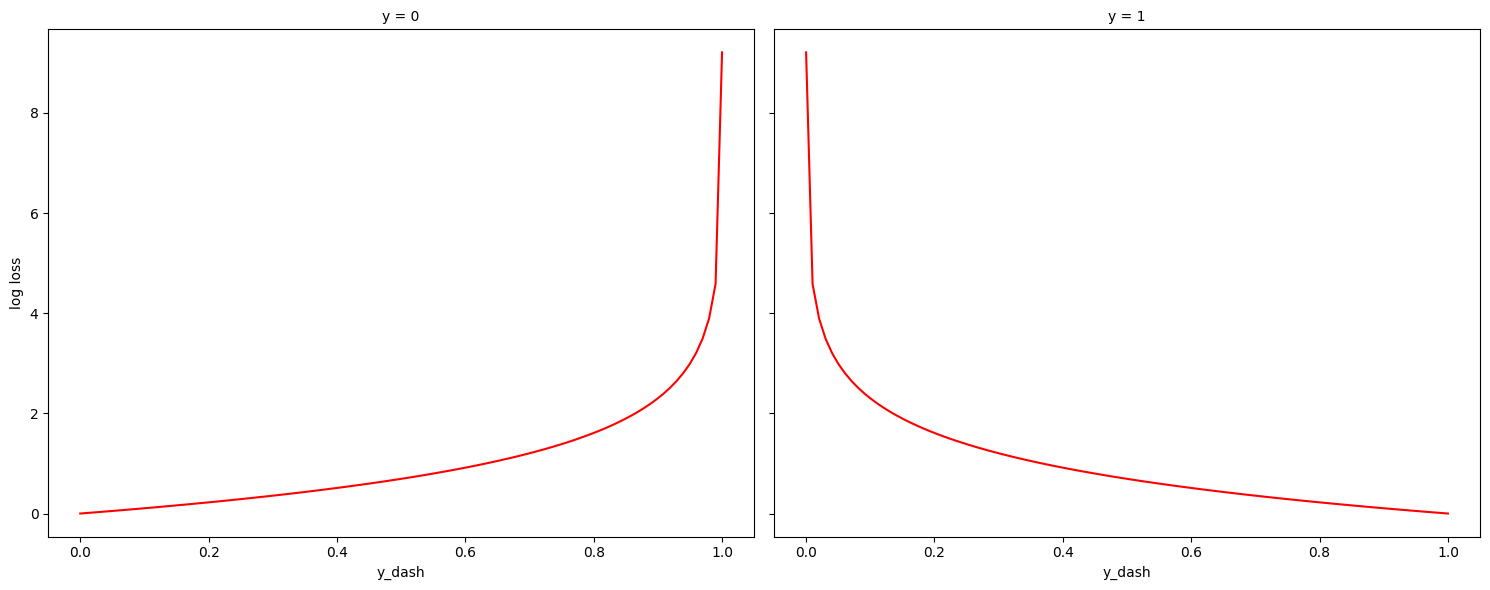

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Log loss function
def log_loss(y, y_dash):
    """Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1).

    Args:
        y (scalar): true value (0 or 1)
        y_dash (scalar): predicted value (probability of y being 1)

    Returns:
        loss (float): nonnegative loss corresponding to y and y_dash
    """
    # Ensure y_dash is not exactly 0 or 1 to avoid log(0)
    y_dash = np.clip(y_dash, 1e-15, 1 - 1e-15)
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

# Test log loss function
y_values = [0, 1]
y_dash_values = [0.8, 0.6, 0.4, 0.3]

for y in y_values:
    for y_dash in y_dash_values:
        print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")

# Log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
y_dash = np.linspace(0.0001, 0.9999, 100)

# Plot for y = 0
ax[0].plot(y_dash, log_loss(0, y_dash), color='red')
ax[0].set_title("y = 0", fontsize=10)
ax[0].set_xlabel("y_dash", fontsize=10)
ax[0].set_ylabel("log loss", fontsize=10)

# Plot for y = 1
ax[1].plot(y_dash, log_loss(1, y_dash), color='red')
ax[1].set_title("y = 1", fontsize=10)
ax[1].set_xlabel("y_dash", fontsize=10)

plt.tight_layout()
plt.show()


2.Relu

relu(-110) = 0
relu(9) = 9


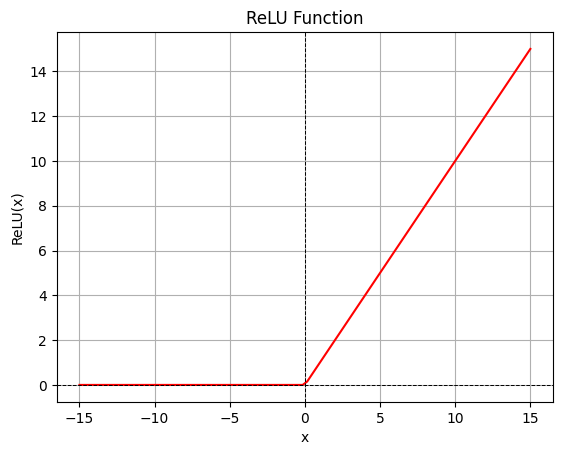

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function
def relu(x):
    return max(0, x)

# Test the ReLU function
print(f"relu(-110) = {relu(-110)}")
print(f"relu(9) = {relu(9)}")

# Function to plot ReLU
def plot_relu():
    x = np.linspace(-15, 15, 100)

    relu_values = np.maximum(0, x)

    # Plot the ReLU function
    plt.plot(x, relu_values, color='red')
    plt.title("ReLU Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.7, ls='--')  # x-axis
    plt.axvline(0, color='black', lw=0.7, ls='--')  # y-axis
    plt.show()
plot_relu()


3.Sigmoid Function

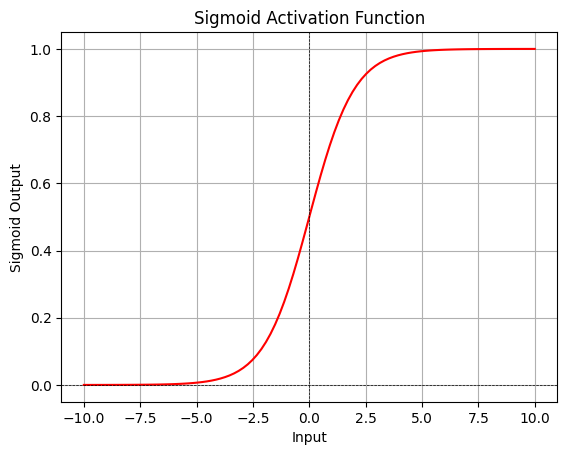

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot Sigmoid
def plot_sigmoid():
    x = np.linspace(-10, 10, 100)

    y = 1 / (1 + np.exp(-x))

    plt.plot(x, y, color='red')
    plt.xlabel('Input')
    plt.ylabel('Sigmoid Output')
    plt.title('Sigmoid Activation Function')
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5, ls='--')  # x-axis
    plt.axvline(0, color='black', lw=0.5, ls='--')  # y-axis
    plt.show()

plot_sigmoid()


4.TanH

tanh(-75) = -1.0
tanh(4.7) = 0.9998345655542967


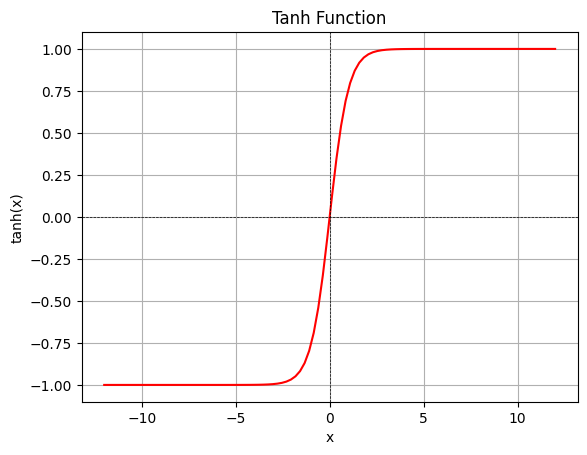

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Tanh function
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

print(f"tanh(-75) = {tanh(-75)}")
print(f"tanh(4.7) = {tanh(4.7)}")

# Function to plot Tanh
def plot_tanh():
    x = np.linspace(-12, 12, 100)

    tanh_values = np.tanh(x)

    # Plot the tanh function
    plt.plot(x, tanh_values, color='red')
    plt.title("Tanh Function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5, ls='--')  # x-axis
    plt.axvline(0, color='black', lw=0.5, ls='--')  # y-axis
    plt.show()
    plot_tanh()


Sklearn Implementation of MultiLayer Perceptron(MLP)

Accuracy: 0.7727272727272727

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



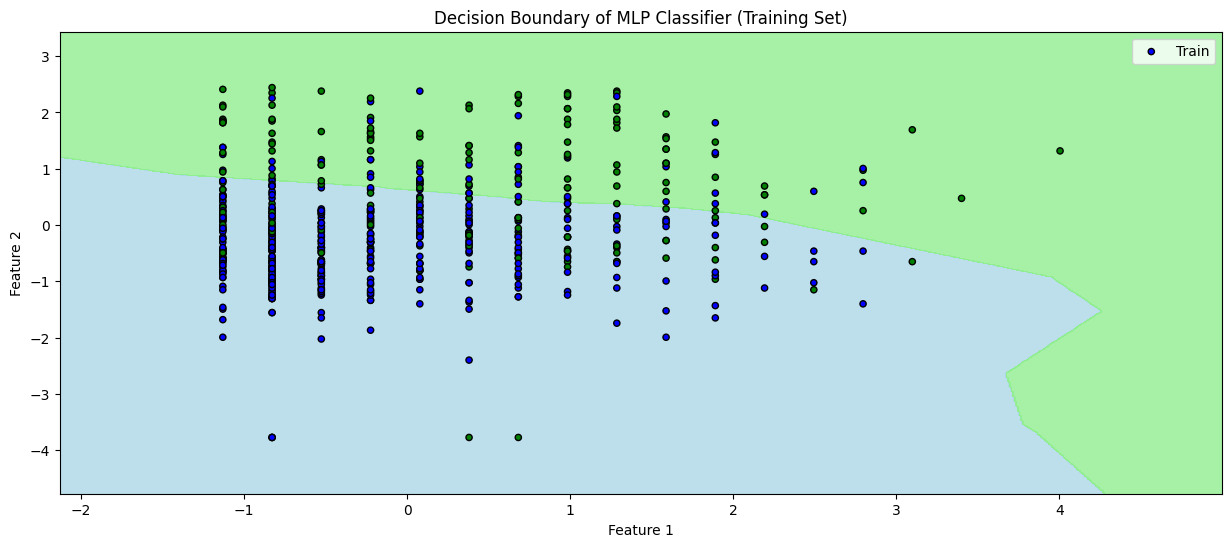

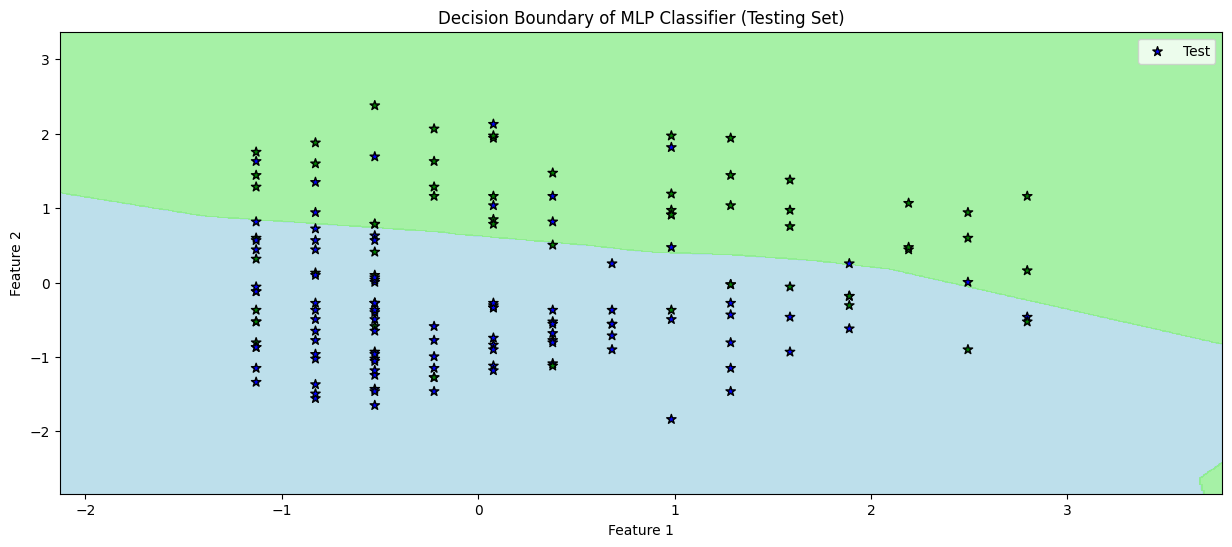

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")  # Replace with the correct path to your dataset

X = df.iloc[:, :-1].values[:, :2]  # Using first two features
y = df.iloc[:, -1].values  # Target labels (diabetes: 1, non-diabetes: 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=47)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z_train = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

cmap_light = ListedColormap(['#ADD8E6', '#90EE90'])  # Light blue and light green
cmap_bold = ListedColormap(['#0000FF', '#008000'])   # Blue and green

plt.figure(figsize=(15, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plot decision boundaries for testing set
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z_test = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(15, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Keras Implementation of MultiLayer Perceptron(MLP)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5332 - loss: 0.7103 - val_accuracy: 0.6423 - val_loss: 0.6694
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6127 - loss: 0.6638 - val_accuracy: 0.6504 - val_loss: 0.6346
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7191 - loss: 0.6090 - val_accuracy: 0.6504 - val_loss: 0.6034
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7070 - loss: 0.5762 - val_accuracy: 0.6992 - val_loss: 0.5757
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7027 - loss: 0.5600 - val_accuracy: 0.7073 - val_loss: 0.5507
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7321 - loss: 0.5364 - val_accuracy: 0.7317 - val_loss: 0.5291
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7262 - loss: 0.5242 - val_accuracy: 0.7480 - val_loss: 0.5107
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7453 - loss: 0.4931 - val_accuracy: 0.7561 - val_loss: 0.4964



Test Loss: 0.5239
Test Accuracy: 0.7532
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



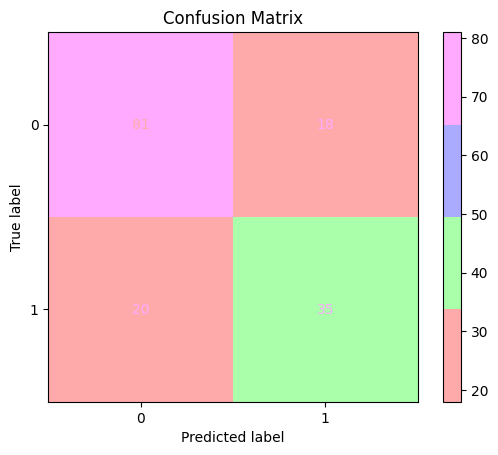

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# Load the diabetes dataset (replace with your own dataset file path)
df = pd.read_csv("diabetes.csv")  # Ensure the correct path to your dataset

# Select the features and target (assuming last column is target)
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, -1].values    # Target (last column)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (helps with convergence and performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test = scaler.transform(X_test)        # Transform the testing data using the same scaler

# Step 2: Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),                                # Another hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')                              # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 6: Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Step 7: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize confusion matrix with custom colors
cmap_custom = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFAAFF'])  # Light red, light green, light blue, light purple
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=cmap_custom)
plt.title("Confusion Matrix")
plt.show()


Backward Propogation from Sratch

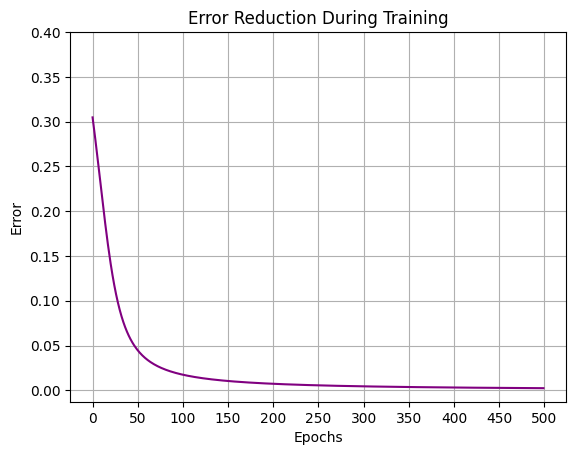

Final Output: [0.06038213833131228, 0.9435865796651929]


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feed_forward(b1, b2, w1, w2, x):
    hidden = []
    output = []

    # Hidden Layer Activation
    hidden.append(sigmoid(b1 + w1[0] * x[0] + w1[1] * x[1]))
    hidden.append(sigmoid(b1 + w1[2] * x[0] + w1[3] * x[1]))

    # Output Layer Activation
    output.append(sigmoid(b2 + w2[0] * hidden[0] + w2[1] * hidden[1]))
    output.append(sigmoid(b2 + w2[2] * hidden[0] + w2[3] * hidden[1]))

    return hidden, output

# Error Calculation
def find_error(output, desired):
    return sum((np.array(output) - np.array(desired))**2) / 2

# Backpropagation
def back_propagate(w1, w2, hidden, output, desired, x, alpha):
    # Compute error terms for output layer
    delta_output = [(output[i] - desired[i]) * sigmoid_derivative(output[i]) for i in range(len(output))]

    # Compute error terms for hidden layer
    delta_hidden = []
    for i in range(2):
        temp = sum(delta_output[j] * w2[i + j * 2] for j in range(2))
        delta_hidden.append(temp * sigmoid_derivative(hidden[i]))

    # Update weights for hidden-to-output layer
    for i in range(len(w2)):
        w2[i] -= alpha * delta_output[i // 2] * hidden[i % 2]

    # Update weights for input-to-hidden layer
    for i in range(len(w1)):
        w1[i] -= alpha * delta_hidden[i // 2] * x[i % 2]

# Initialization with New Values
w1 = [0.1, 0.15, 0.2, 0.25]  # New weights for input to hidden layer
w2 = [0.35, 0.4, 0.45, 0.5]  # New weights for hidden to output layer
x = [0.05, 0.10]  # Input values (adjust based on your dataset)
b1 = 0.5  # New bias for hidden layer
b2 = 0.7  # New bias for output layer
desired = [0.01, 0.99]  # Desired output
epochs = 500  # Training iterations
alpha = 0.5  # Learning rate
error = []

# Training Loop
for _ in range(epochs):
    hidden, output = feed_forward(b1, b2, w1, w2, x)
    error.append(find_error(output, desired))
    back_propagate(w1, w2, hidden, output, desired, x, alpha)

# Plot Error Reduction Over Time
plt.plot(error, color='purple')  # Change color to purple
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction During Training")
plt.grid(True)  # Add grid for better visibility
plt.xticks(np.arange(0, epochs+1, step=50))  # Adjust x-axis ticks for better spacing
plt.yticks(np.arange(0, max(error)+0.1, step=0.05))  # Adjust y-axis ticks for better spacing
plt.show()

# Final Output after Training
print("Final Output:", output)
